In [84]:
!pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy

In [201]:
import pandas as pd

df = pd.read_csv('./datasets/일반고용동향_20251113.csv', index_col='index')
df = df.T.reset_index().rename(columns={'index':'날짜'})
df

index,날짜,15세이상 인구,경제활동인구,취업자,취업자 증감,실업자,비경제활동인구,경제활동참가율(15-64세),- 남자 경활참가율(15-64세),- 여자 경활참가율(15-64세),고용률(15-64세),실업률,취업준비자,구직단념자
0,2022,"45,260","28,922","28,089",816,833,"16,339",70.5,79.0,61.8,68.5,2.9,763,443
1,2023,"45,407","29,203","28,416",327,787,"16,204",71.1,79.0,63.1,69.2,2.7,676,362
2,2024,"45,570","29,399","28,576",159,823,"16,172",71.5,78.9,63.9,69.5,2.8,627,371
3,202504월,"45,720","29,741","28,887",194,854,"15,979",72.1,79.2,64.9,69.9,2.9,669,338
4,202505월,"45,734","30,012","29,160",245,853,"15,722",72.7,79.7,65.4,70.5,2.8,659,345
5,202506월,"45,743","29,915","29,091",183,825,"15,828",72.5,79.4,65.3,70.3,2.8,651,341
6,202507월,"45,758","29,754","29,029",171,726,"16,004",72.1,79.0,65.0,70.2,2.4,633,396
7,202508월,"45,779","29,559","28,967",166,592,"16,220",71.5,78.5,64.4,69.9,2.0,635,409
8,202509월,"45,797","29,788","29,154",312,635,"16,009",72.1,78.9,65.0,70.4,2.1,609,369


In [202]:
df.columns = df.columns.str.replace('\xa0', '', regex=False)
print(df.columns.tolist())

df.dtypes

['날짜', '15세이상인구', '경제활동인구', '취업자', '취업자증감', '실업자', '비경제활동인구', '경제활동참가율(15-64세)', '-남자경활참가율(15-64세)', '-여자경활참가율(15-64세)', '고용률(15-64세)', '실업률', '취업준비자', '구직단념자']


index
날짜                  object
15세이상인구             object
경제활동인구              object
취업자                 object
취업자증감               object
실업자                 object
비경제활동인구             object
경제활동참가율(15-64세)     object
-남자경활참가율(15-64세)    object
-여자경활참가율(15-64세)    object
고용률(15-64세)         object
실업률                 object
취업준비자               object
구직단념자               object
dtype: object

In [204]:
cols_change = ['15세이상인구', '경제활동인구', '취업자']

for i in cols_change:
    df[i] = df[i].str.replace(',', '').astype(float)

df.dtypes

index
날짜                   object
15세이상인구             float64
경제활동인구              float64
취업자                 float64
취업자증감               float64
실업자                 float64
비경제활동인구             float64
경제활동참가율(15-64세)     float64
-남자경활참가율(15-64세)    float64
-여자경활참가율(15-64세)    float64
고용률(15-64세)         float64
실업률                 float64
취업준비자               float64
구직단념자               float64
dtype: object

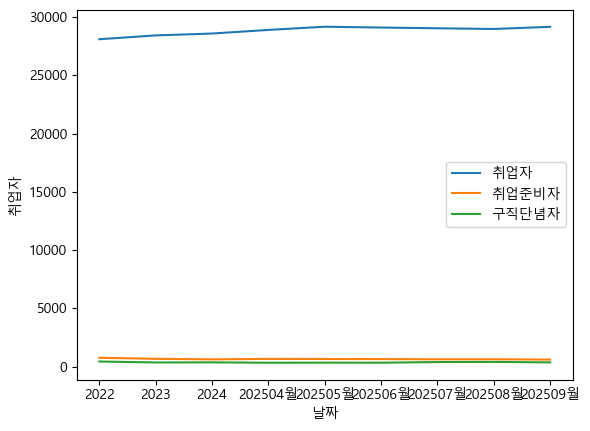

In [205]:
sns.lineplot(x=df['날짜'], y=df['취업자'], label='취업자')
sns.lineplot(x=df['날짜'], y=df['취업준비자'], label='취업준비자')
sns.lineplot(x=df['날짜'], y=df['구직단념자'], label='구직단념자')

plt.show()

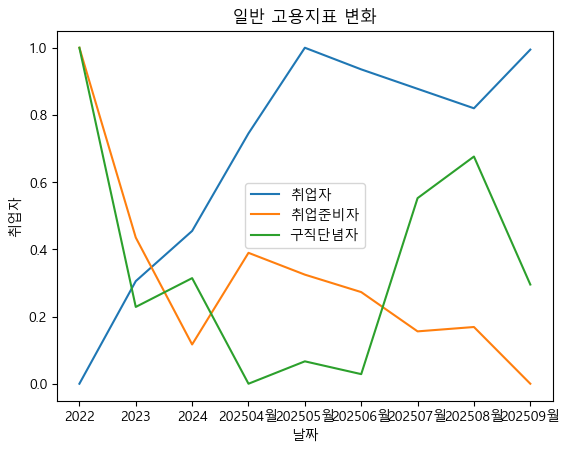

In [212]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 스케일링할 컬럼
cols = ['취업자', '취업준비자', '구직단념자']

# fit_transform 적용
scaled = scaler.fit_transform(df[cols])

# 새로운 컬럼으로 저장
df['취업자'] = scaled[:, 0]
df['취업준비자'] = scaled[:, 1]
df['구직단념자'] = scaled[:, 2]

# 그래프
sns.lineplot(x=df['날짜'], y=df['취업자'], label='취업자')
sns.lineplot(x=df['날짜'], y=df['취업준비자'], label='취업준비자')
sns.lineplot(x=df['날짜'], y=df['구직단념자'], label='구직단념자')

plt.title("일반 고용지표 변화")
plt.show()


In [200]:
print(df.columns.tolist())

['날짜', '생산가능인구', '경제활동인구', '취업자', '실업자', '실업률', '고용률', '경제활동참가율']


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [167]:
import pandas as pd

df2 = pd.read_csv('./datasets/청년고용동향_20251113.csv', index_col='index')
df2 = df2.T.reset_index().rename(columns={'index':'날짜'})
df2

index,날짜,생산가능인구,경제활동인구,취업자,실업자,실업률,고용률,경제활동참가율
0,2015,"9,380","4,253","3,864",389,9.1,41.2,45.3
1,2016,"9,363","4,334","3,908",426,9.8,41.7,46.3
2,2017,"9,282","4,333","3,907",426,9.8,42.1,46.7
3,2018,"9,149","4,312","3,904",408,9.5,42.7,47.1
4,2019,"9,060","4,331","3,945",386,8.9,43.5,47.8
5,2020,"8,911","4,133","3,763",370,9.0,42.2,46.4
6,2021,"8,770","4,203","3,877",326,7.8,44.2,47.9
7,2022,"8,567","4,269","3,996",272,6.4,46.6,49.8
8,2023,"8,390","4,142","3,899",243,5.9,46.5,49.4
9,2024,"8,152","3,990","3,755",235,5.9,46.1,48.9


In [172]:
df2.dtypes

index
날짜         object
생산가능인구     object
경제활동인구     object
취업자        object
실업자        object
실업률        object
고용률        object
경제활동참가율    object
dtype: object

In [179]:
# cols_change = ['생산가능인구', '경제활동인구', '취업자']

# for i in cols_change:
#     df2[i] = df2[i].str.replace(',', '').astype(float)

df2['실업자'] = df2['실업자'].astype(float)
df2['실업률'] = df2['실업률'].astype(float)
df2['고용률'] = df2['고용률'].astype(float)
df2['경제활동참가율'] = df2['경제활동참가율'].astype(float)

df2.dtypes

index
날짜          object
생산가능인구     float64
경제활동인구     float64
취업자        float64
실업자        float64
실업률        float64
고용률        float64
경제활동참가율    float64
dtype: object

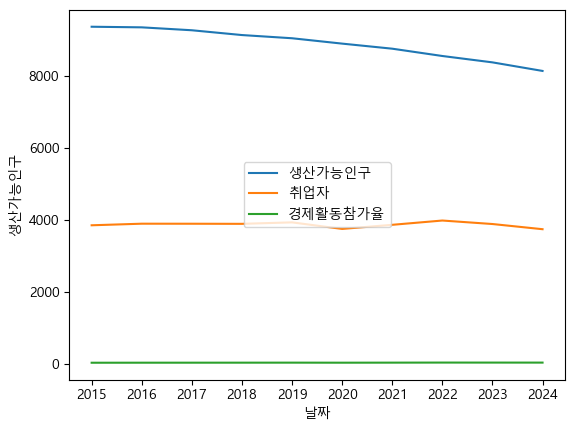

In [183]:
sns.lineplot(x=df2['날짜'], y=df2['생산가능인구'], label='생산가능인구')
sns.lineplot(x=df2['날짜'], y=df2['취업자'], label='취업자')
sns.lineplot(x=df2['날짜'], y=df2['경제활동참가율'], label='경제활동참가율')

plt.show()

In [184]:
print(df2['경제활동참가율'])

0    45.3
1    46.3
2    46.7
3    47.1
4    47.8
5    46.4
6    47.9
7    49.8
8    49.4
9    48.9
Name: 경제활동참가율, dtype: float64


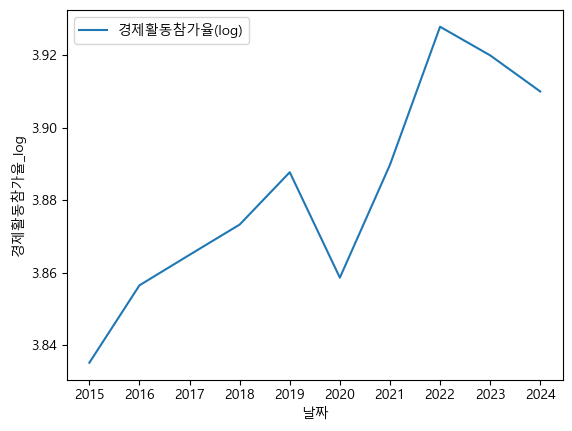

In [185]:
import numpy as np

df2['경제활동참가율_log'] = np.log1p(df2['경제활동참가율'])
sns.lineplot(x=df2['날짜'], y=df2['경제활동참가율_log'], label='경제활동참가율(log)')
plt.show()


In [192]:
df2['경제활동참가율'] = np.sqrt(df2['경제활동참가율'])
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2['생산가능인구'] = scaler.fit_transform(df2[['생산가능인구']])
df2['취업자'] = scaler.fit_transform(df2[['취업자']])
df2['경제활동참가율'] = scaler.fit_transform(df2[['경제활동참가율']])


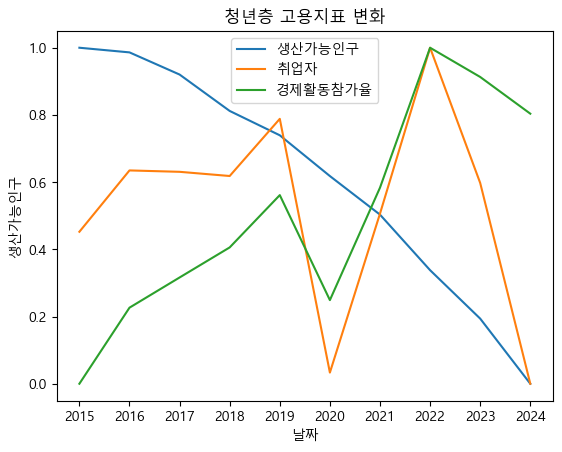

In [211]:
sns.lineplot(x=df2['날짜'], y=df2['생산가능인구'], label='생산가능인구')
sns.lineplot(x=df2['날짜'], y=df2['취업자'], label='취업자')
sns.lineplot(x=df2['날짜'], y=df2['경제활동참가율'], label='경제활동참가율')

plt.title("청년층 고용지표 변화")
plt.show()
